In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
#Ver con glob para carpeta local
df0= pd.read_csv('DEN_2015.csv', sep=';')
df1= pd.read_csv('DEN_2016.csv', sep=';')
df2= pd.read_csv('DEN_2017.csv', sep=';')
df3= pd.read_csv('DEN_2018.csv', sep=';')
df4= pd.read_csv('DEN_2019.csv', sep=';')
df5= pd.read_csv('DEN_2020.csv', sep=';')
DF_TOTAL=[df0, df1, df2, df3, df4, df5]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (34) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
for df in DF_TOTAL:
    #Cantidad de Departamentos, Distritos y Provincias
    df["Dep-Prov-Distrito"] = df["Departamento"] + ", " + df["Provincia"] + ", " + df["Distrito"]
    df["Dep-Prov"] = df["Departamento"] + ", " + df["Provincia"]
    print("La cantidad de departamentos es:", df['Departamento'].nunique())
    print("La cantidad de distritos es:", df['Dep-Prov-Distrito'].nunique())
    print("La cantidad de provincias es:", df['Dep-Prov'].nunique())
    print('----------------')

La cantidad de departamentos es: 18
La cantidad de distritos es: 230
La cantidad de provincias es: 65
----------------
La cantidad de departamentos es: 18
La cantidad de distritos es: 249
La cantidad de provincias es: 66
----------------
La cantidad de departamentos es: 19
La cantidad de distritos es: 329
La cantidad de provincias es: 74
----------------
La cantidad de departamentos es: 19
La cantidad de distritos es: 179
La cantidad de provincias es: 62
----------------
La cantidad de departamentos es: 19
La cantidad de distritos es: 246
La cantidad de provincias es: 72
----------------
La cantidad de departamentos es: 20
La cantidad de distritos es: 376
La cantidad de provincias es: 89
----------------


In [4]:
DF_TOTAL_T = pd.concat(DF_TOTAL, axis=0, ignore_index=True)

In [5]:
DF_TOTAL_T = DF_TOTAL_T[['Dep-Prov-Distrito', 'Distrito', 'Semana', 'Incidencia semanal','Casos', 'pobtot', 'Año']] 
DF_TOTAL_T['Incidencia semanal']= df['Incidencia semanal'].str.replace(',', '.').astype(float)
DF_TOTAL_T['Semana'] = DF_TOTAL_T['Semana'] + DF_TOTAL_T['Año'].apply(lambda x: (x-2015)*53 if x>2015 else 0)

#Calculo de columna de incidencia
DF_TOTAL_T['Incidencia Calculada'] = (DF_TOTAL_T['Casos']/DF_TOTAL_T['pobtot'])*100000

#Verificamos si esta vacío para completar
DF_TOTAL_T['Incidencia semanal'].fillna(DF_TOTAL_T['Incidencia Calculada'], inplace=True)

#Borramos la columna auxiliar de Incidencia Calculada
#DF_TOTAL_T = DF_TOTAL_T.drop(['Incidencia Calculada','pobtot'], axis=1)
DF_TOTAL_T

,Dep-Prov-Distrito,Distrito,Semana,Incidencia semanal,Casos,pobtot,Año,Incidencia Calculada
0,"LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE",LAMBAYEQUE,24,1.24886,1.0,77234,2015,1.294767
1,"LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE",LAMBAYEQUE,27,1.24886,1.0,77234,2015,1.294767
2,"LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE",LAMBAYEQUE,21,1.24886,1.0,77234,2015,1.294767
3,"LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE",LAMBAYEQUE,53,0.00000,0.0,77234,2015,0.000000
4,"LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE",LAMBAYEQUE,52,0.00000,0.0,77234,2015,0.000000
...,...,...,...,...,...,...,...,...
85272,"HUANUCO, LEONCIO PRADO, CASTILLO GRANDE",CASTILLO GRANDE,283,0.00000,0.0,11457,2020,0.000000
85273,"HUANUCO, LEONCIO PRADO, CASTILLO GRANDE",CASTILLO GRANDE,284,0.00000,0.0,11457,2020,0.000000
85274,"HUANUCO, LEONCIO PRADO, CASTILLO GRANDE",CASTILLO GRANDE,285,0.00000,0.0,11457,2020,0.000000
85275,"HUANUCO, LEONCIO PRADO, CASTILLO GRANDE",CASTILLO GRANDE,286,0.00000,0.0,11457,2020,0.000000


In [6]:
DF_TOTAL_T.to_csv('DEN_2015to2020.csv', index = False)

In [7]:
listaDistrito = DF_TOTAL_T['Dep-Prov-Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print('Son ', len(listaDistrito), ' distritos')
listaDistrito.sort()
print(listaDistrito)

Son  505  distritos
['AMAZONAS, BAGUA, ARAMANGO', 'AMAZONAS, BAGUA, BAGUA', 'AMAZONAS, BAGUA, COPALLIN', 'AMAZONAS, BAGUA, EL PARCO', 'AMAZONAS, BAGUA, IMAZA', 'AMAZONAS, BAGUA, LA PECA', 'AMAZONAS, BONGARA, FLORIDA', 'AMAZONAS, BONGARA, JAZAN', 'AMAZONAS, CHACHAPOYAS, CHACHAPOYAS', 'AMAZONAS, CONDORCANQUI, EL CENEPA', 'AMAZONAS, CONDORCANQUI, NIEVA', 'AMAZONAS, CONDORCANQUI, RIO SANTIAGO', 'AMAZONAS, UTCUBAMBA, BAGUA GRANDE', 'AMAZONAS, UTCUBAMBA, CAJARURO', 'AMAZONAS, UTCUBAMBA, CUMBA', 'AMAZONAS, UTCUBAMBA, EL MILAGRO', 'AMAZONAS, UTCUBAMBA, JAMALCA', 'AMAZONAS, UTCUBAMBA, YAMON', 'ANCASH, CASMA, BUENA VISTA ALTA', 'ANCASH, CASMA, CASMA', 'ANCASH, CASMA, COMANDANTE NOEL', 'ANCASH, HUARMEY, HUARMEY', 'ANCASH, SANTA, CHIMBOTE', 'ANCASH, SANTA, COISHCO', 'ANCASH, SANTA, NEPEÑA', 'ANCASH, SANTA, NUEVO CHIMBOTE', 'ANCASH, SANTA, SANTA', 'AREQUIPA, CARAVELI, BELLA UNION', 'AYACUCHO, CANGALLO, CANGALLO', 'AYACUCHO, HUAMANGA, AYACUCHO', 'AYACUCHO, HUAMANGA, JESUS NAZARENO', 'AYACUCHO, HUAMA

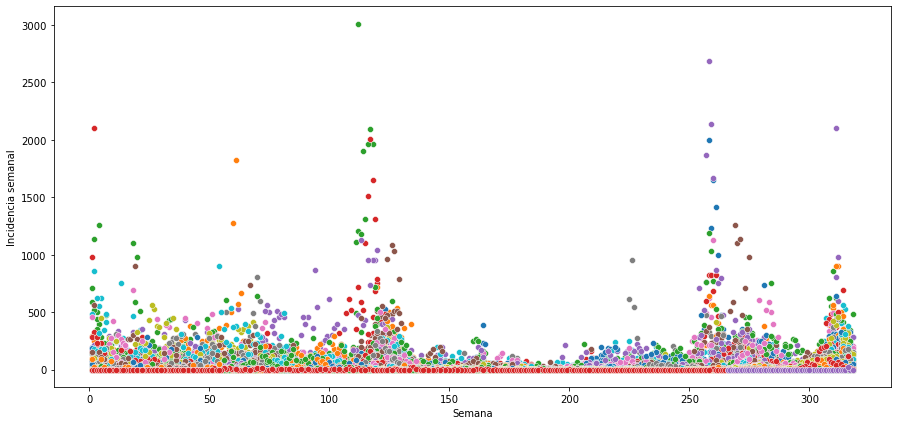

In [8]:
timeSeries = pd.DataFrame()
timeSeries_Casos = pd.DataFrame()
plt.figure(figsize=[15,7])
for dis in listaDistrito:
    distrito=DF_TOTAL_T[DF_TOTAL_T['Dep-Prov-Distrito']==dis]
    distrito.sort_values(['Semana'], ascending = True)    
    distrito = distrito.reset_index(drop=True)
    timeSeries = timeSeries.append(distrito['Incidencia semanal'])
    timeSeries_Casos = timeSeries_Casos.append(distrito['Casos'])
    #timeSeriesNorm = timeSeriesNorm.append(pd.Series(normalizado.flatten()), ignore_index=True)
    #print(dis)
    ax = sns.scatterplot(y=distrito['Incidencia semanal'], x= distrito['Semana'])
plt.show()

In [9]:
#timeSeriesNorm.to_csv('SerieTemporalNorm_2015to2020.csv', index = False)
timeSeries.to_csv('SerieTemporal_2015to2020.csv', index = False)

In [10]:
timeSeries_Casos.to_csv('SerieTemporal_Casos_2015to2020.csv', index = False)

In [11]:
len(timeSeries.iloc[1,:].values)

318